<a href="https://colab.research.google.com/github/kishore-100/CodSoft/blob/main/MOVIE_GENRE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Genre Classification Dataset/train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
x_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Genre Classification Dataset/test_data.txt",sep=':::', names=['ID', 'TITLE', 'DESCRIPTION'])
df_test_sol= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Genre Classification Dataset/test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

<ipython-input-7-c82fd6c944d5>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Genre Classification Dataset/train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
<ipython-input-7-c82fd6c944d5>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  x_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Genre Classification Dataset/test_data.txt",sep=':::', names=['ID', 'TITLE', 'DESCRIPTION'])
<ipython-input-7-c82fd6c944d5>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex

In [ ]:
df_train.head(3)

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...


In [ ]:
x_test.head(3)

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...


In [ ]:
df_test_sol

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [ ]:
df_test_sol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   GENRE        54200 non-null  object
 3   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


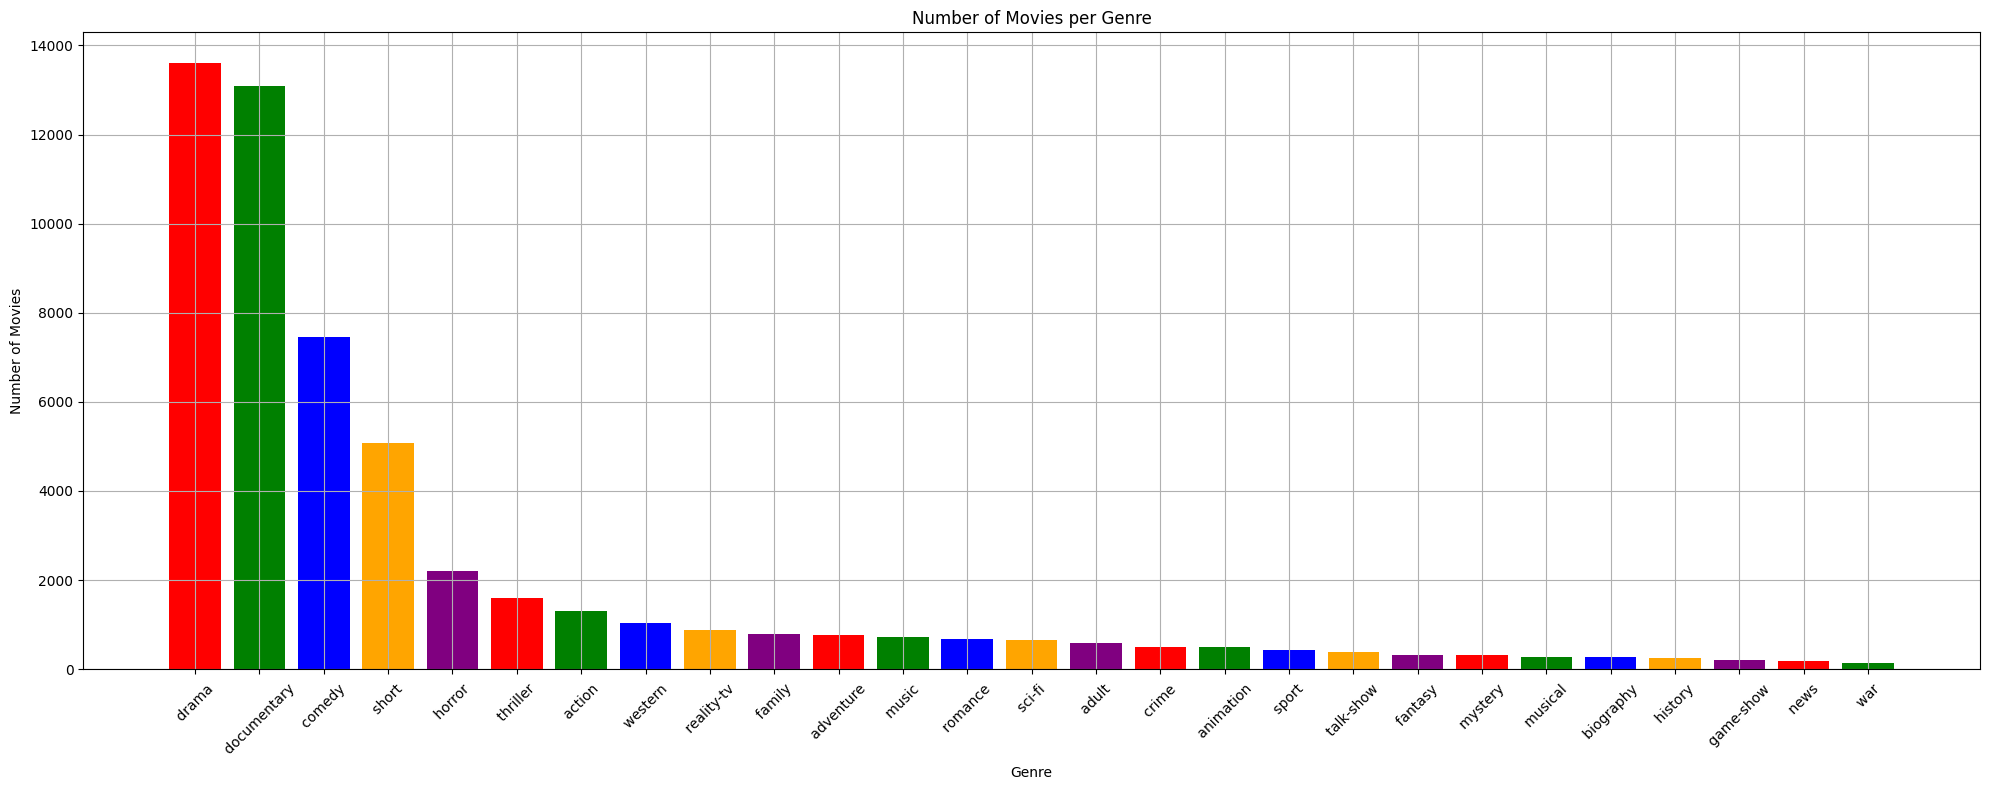

The most watched genre is:  drama 


In [ ]:
import matplotlib.pyplot as plt

genre_counts = df_train['GENRE'].value_counts()

plt.figure(figsize=(20,8))

plt.bar(genre_counts.index, genre_counts.values,color=['red', 'green', 'blue', 'orange', 'purple'])
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)  # Rotate genre labels for better readability
plt.tight_layout()
plt.grid()
plt.show()

most_watched_genre = genre_counts.idxmax()

print("The most watched genre is:", most_watched_genre)

In [ ]:
df_train=df_train.drop(columns=['ID'],axis=1)
x_test=x_test.drop(columns=['ID'],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['GENRE'] = le.fit_transform(df_train['GENRE'])

df_test_sol['GENRE'] = le.fit_transform(df_test_sol['GENRE'])

In [ ]:
df_train['combined_text'] = df_train['TITLE'] + ' ' + df_train['DESCRIPTION']
x_test['combined_text'] = x_test['TITLE'] + ' ' + x_test['DESCRIPTION']

In [ ]:
X_train=df_train.drop(['GENRE','DESCRIPTION','TITLE'],axis=1)

X_test=x_test.drop(['DESCRIPTION','TITLE'],axis=1)

In [ ]:
y_train=df_train['GENRE']
y_test=df_test_sol['GENRE']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer on X_train
tfidf_vectorizer.fit(X_train['combined_text'])

X_train = tfidf_vectorizer.transform(X_train['combined_text'])
X_test = tfidf_vectorizer.transform(X_test['combined_text'])

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model=LogisticRegression(C=1)
log_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [ ]:
y_train_pred1=log_model.predict(x_train)
print(classification_report(y_train,y_train_pred1))

              precision    recall  f1-score   support

           0       0.77      0.43      0.55      1180
           1       0.89      0.35      0.50       520
           2       0.86      0.25      0.39       691
           3       0.96      0.09      0.17       458
           4       0.00      0.00      0.00       242
           5       0.71      0.80      0.75      6705
           6       0.72      0.06      0.11       454
           7       0.74      0.94      0.83     11801
           8       0.65      0.91      0.76     12238
           9       0.78      0.17      0.28       699
          10       0.88      0.02      0.05       296
          11       0.95      0.53      0.68       176
          12       0.00      0.00      0.00       209
          13       0.81      0.76      0.78      2008
          14       0.83      0.54      0.65       658
          15       0.91      0.04      0.07       256
          16       1.00      0.01      0.03       293
          17       0.86    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_val_pred1=log_model.predict(x_val)
print(classification_report(y_val,y_val_pred1))

              precision    recall  f1-score   support

           0       0.48      0.19      0.28       135
           1       0.86      0.26      0.40        70
           2       0.67      0.14      0.24        84
           3       1.00      0.05      0.10        40
           4       0.00      0.00      0.00        23
           5       0.56      0.60      0.58       742
           6       0.00      0.00      0.00        51
           7       0.64      0.88      0.74      1295
           8       0.56      0.82      0.66      1375
           9       0.53      0.09      0.16        85
          10       0.00      0.00      0.00        27
          11       1.00      0.44      0.62        18
          12       0.00      0.00      0.00        34
          13       0.65      0.57      0.60       196
          14       0.68      0.37      0.48        73
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        26
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_test_pred1=log_model.predict(X_test)
print(classification_report(y_test,y_test_pred1))

              precision    recall  f1-score   support

           0       0.54      0.26      0.35      1314
           1       0.62      0.18      0.28       590
           2       0.73      0.17      0.28       775
           3       0.62      0.01      0.02       498
           4       0.00      0.00      0.00       264
           5       0.55      0.59      0.57      7446
           6       0.44      0.02      0.05       505
           7       0.65      0.87      0.75     13096
           8       0.54      0.80      0.64     13612
           9       0.53      0.08      0.14       783
          10       0.00      0.00      0.00       322
          11       0.90      0.49      0.63       193
          12       0.00      0.00      0.00       243
          13       0.67      0.58      0.62      2204
          14       0.69      0.40      0.51       731
          15       0.67      0.01      0.01       276
          16       1.00      0.00      0.01       318
          17       0.60    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import LinearSVC

svc_model=LinearSVC(penalty='l2',C=0.1,dual=False)
svc_model.fit(x_train,y_train)

LinearSVC(C=0.1, dual=False)

In [ ]:
y_train_pred2=svc_model.predict(x_train)
print(classification_report(y_train,y_train_pred2))

              precision    recall  f1-score   support

           0       0.89      0.53      0.66      1180
           1       0.96      0.57      0.71       520
           2       0.95      0.40      0.56       691
           3       0.98      0.37      0.54       458
           4       1.00      0.00      0.01       242
           5       0.76      0.77      0.77      6705
           6       1.00      0.15      0.26       454
           7       0.74      0.95      0.83     11801
           8       0.66      0.91      0.76     12238
           9       0.95      0.24      0.39       699
          10       0.95      0.20      0.33       296
          11       0.94      0.81      0.87       176
          12       0.00      0.00      0.00       209
          13       0.81      0.84      0.82      2008
          14       0.90      0.67      0.77       658
          15       0.97      0.14      0.25       256
          16       1.00      0.16      0.27       293
          17       0.97    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_val_pred2=svc_model.predict(x_val)
print(classification_report(y_val,y_val_pred2))

              precision    recall  f1-score   support

           0       0.51      0.17      0.26       135
           1       0.88      0.31      0.46        70
           2       0.79      0.18      0.29        84
           3       1.00      0.10      0.18        40
           4       0.00      0.00      0.00        23
           5       0.56      0.56      0.56       742
           6       0.00      0.00      0.00        51
           7       0.61      0.90      0.73      1295
           8       0.56      0.82      0.67      1375
           9       0.60      0.07      0.13        85
          10       0.00      0.00      0.00        27
          11       0.82      0.50      0.62        18
          12       0.00      0.00      0.00        34
          13       0.59      0.60      0.60       196
          14       0.61      0.32      0.41        73
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        26
          17       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_test_pred2=svc_model.predict(X_test)
print(classification_report(y_test,y_test_pred2))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.56      0.24      0.34      1314
           1       0.69      0.23      0.34       590
           2       0.73      0.18      0.28       775
           3       0.64      0.03      0.06       498
           4       0.00      0.00      0.00       264
           5       0.56      0.55      0.56      7446
           6       0.58      0.01      0.03       505
           7       0.64      0.90      0.74     13096
           8       0.54      0.80      0.64     13612
           9       0.60      0.07      0.12       783
          10       0.40      0.01      0.02       322
          11       0.83      0.60      0.70       193
          12       0.00      0.00      0.00       243
          13       0.63      0.63      0.63      2204
          14       0.67      0.41      0.51       731
          15       0.50      0.01      0.01       276
          16       0.20      0.00      0.01       318
          17       0.78    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def predict_genre(title, description, model, vectorizer, label_encoder):

    data = pd.DataFrame({'TITLE': [title], 'DESCRIPTION': [description]})

    data['combined_text'] = data['TITLE'] + ' ' + data['DESCRIPTION']

    X_new = vectorizer.transform(data['combined_text'])

    y_pred = model.predict(X_new)
    predicted_genre = label_encoder.inverse_transform(y_pred)[0]

    return predicted_genre

In [ ]:
predict_genre("Edgar's Lunch (1998)","L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa.",svc_model,tfidf_vectorizer,le)

' drama '